<a href="https://colab.research.google.com/github/j-5912d/Math_Statistics/blob/main/Lesson_8_Math_Statics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import scipy.stats as stats
import statistics
import warnings
import matplotlib.pyplot as plt

# Задание 1

1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].

Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy Полученные значения должны быть равны.

Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков, а затем с использованием функций из библиотек numpy и pandas.


In [3]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

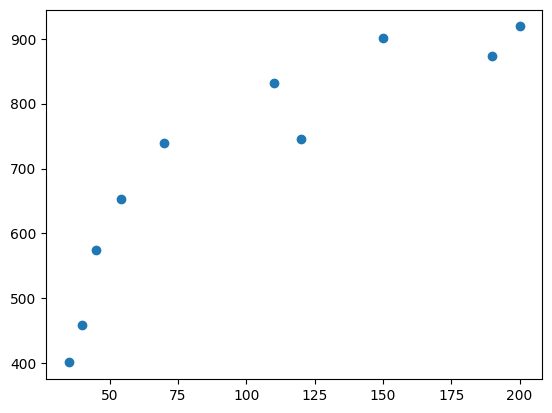

In [4]:
plt.scatter(zp, ks)

In [6]:
cov = np.mean(zp * ks) - np.mean(zp) * np.mean(ks)
cov

9157.839999999997

In [5]:
np.cov(zp, ks)

array([[ 3882.93333333, 10175.37777778],
       [10175.37777778, 33854.32222222]])

In [8]:
np.cov(zp, ks, ddof = 0)

array([[ 3494.64,  9157.84],
       [ 9157.84, 30468.89]])

Значения различаются, поскольку в случае расчета ковариации элементарными действиями, она расчитывается как смещенная, расчитав ковариацию с помощью функции cov она автоматически не смещенная, если её сместить, то она сходится с первой расчётной ковариацией.

In [16]:
sigma_z = np.std(zp, ddof = 0)
sigma_z

59.115480206118605

In [17]:
sigma_k = np.std(ks, ddof = 0)
sigma_k

174.55340157098058

In [18]:
cov/(sigma_z * sigma_k)

0.8874900920739158

In [12]:
np.corrcoef(zp, ks, ddof = 1)

<ipython-input-12-31af8145ff04>:1: DeprecationWarning: bias and ddof have no effect and are deprecated
  np.corrcoef(zp, ks, ddof = 1)


array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

In [11]:
np.corrcoef(zp, ks, ddof = 0)

<ipython-input-11-59286c9dc201>:1: DeprecationWarning: bias and ddof have no effect and are deprecated
  np.corrcoef(zp, ks, ddof = 0)


array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

Как мы видим, не важно, как рассчитывается коэффициент кореляции пирсона через смещенные или не смещенные среднеквадратичные откланения и ковариации, главное, чтобы все величины были или смещенные или не смещенные

# Задание 2

2. Измерены значения IQ выборки студентов, обучающихся в местных технических вузах: 131, 125, 115, 122, 131, 115, 107, 99, 125, 111. Известно, что в генеральной совокупности IQ распределен нормально. Найдите доверительный интервал для математического ожидания с надежностью 0.95.


In [24]:
iq = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])
a = 0.05

In [25]:
mean = iq.mean()
mean

118.1

In [70]:
sigma = np.std(iq, ddof = 1)
sigma

10.54566788359614

In [31]:
n = len(iq)
n

10

In [53]:
a = 0.05

In [66]:
z = stats.norm.ppf(1-a/2)
z

1.959963984540054

In [71]:
interval_a = round(mean - z* sigma/np.sqrt(n), 3)
interval_b = round(mean + z* sigma/np.sqrt(n), 3)
print(interval_a, " ;  ", interval_b)

111.564  ;   124.636


In [32]:
from statsmodels.stats.weightstats import _tconfint_generic

In [74]:
_tconfint_generic(mean, sigma/np.sqrt(len(iq)),n -1, a, 'two-sided')

(110.55608365158724, 125.64391634841274)

Не могу понять, где закралось отличие, между данными двумя методами расчета., разница на еденицу, а это довольно таки существенно

# Задание 3

3. Известно, что рост футболистов в сборной распределен нормально с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27, среднее выборочное составляет 174.2. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [76]:
disp = 25
sigma = np.sqrt(disp)
n = 27
mean = 174.2
a = 0.05

In [77]:
_tconfint_generic(mean, sigma/np.sqrt(n),n - 1, a, 'two-sided')

(172.2220658754539, 176.17793412454608)

In [78]:
z = stats.norm.ppf(1-a/2)
z

1.959963984540054

In [79]:
interval_a = round(mean - z* sigma/np.sqrt(n), 3)
interval_b = round(mean + z* sigma/np.sqrt(n), 3)
print(interval_a, " ;  ", interval_b)

172.314  ;   176.086
